In [16]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib

# Utils
import warnings
from pathlib import Path

# Exponential Models
# import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape

import statsmodels.api as sm # for statistical models

In [18]:
data_true = sm.datasets.co2.load_pandas()
data = data_true.data                         
data = data['co2'].resample('MS').mean()

data = data.fillna(data.bfill())     # Backward Fill null values

In [54]:
# settings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [14,6]
plt.style.use('fivethirtyeight')

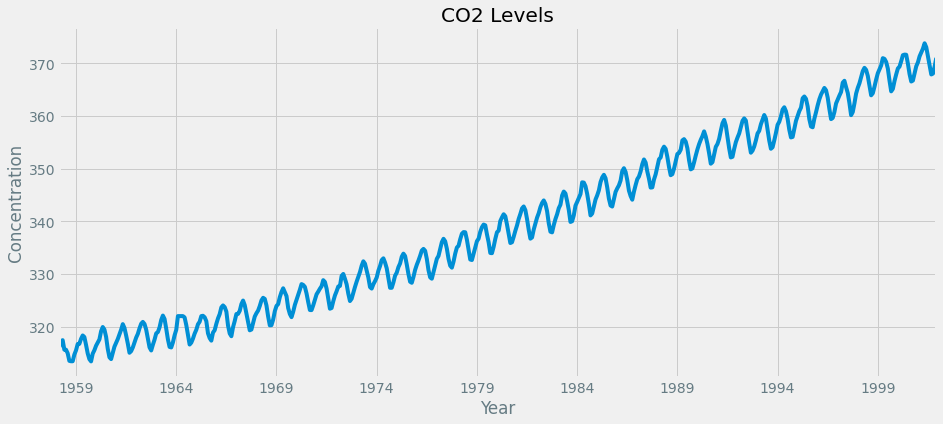

In [55]:
data.plot(title=f'CO2 Levels',ylabel= 'Concentration',xlabel='Year',legend=False);


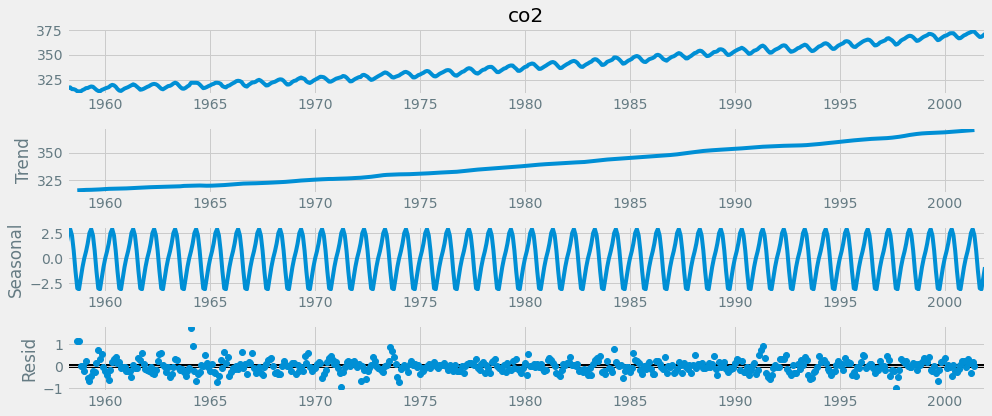

In [56]:
decomp_mul = seasonal_decompose(data)
decomp_mul.plot()
plt.show()

### The decomposition shows a constant trend as well as a constant seasonality

In [57]:
## Test-train split

train = data[:'1997-12-01']
test = data['1998-01-01':]
len(train), len(test)

(478, 48)

### Simple Exponential

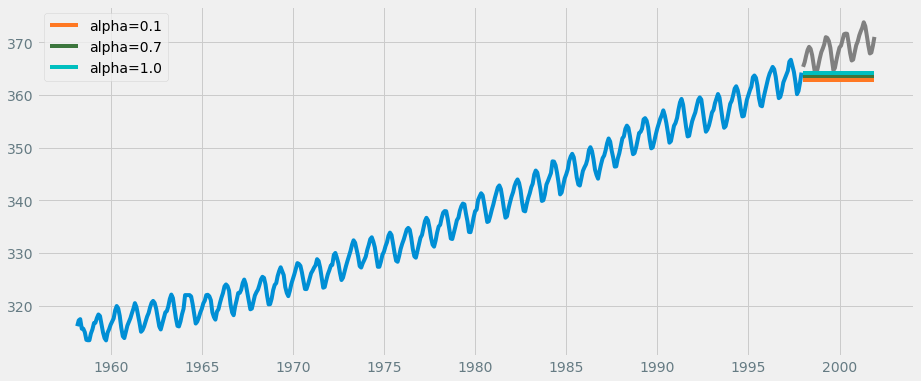

In [62]:
model_SimpleExp = SimpleExpSmoothing(train)

fit1 = model_SimpleExp.fit(smoothing_level=.1)
pred1 = fit1.forecast(len(test))
fit2 = model_SimpleExp.fit(smoothing_level=.7)
pred2 = fit2.forecast(len(test))
fit3 = model_SimpleExp.fit(smoothing_level=1)
pred3 = fit3.forecast(len(test))

plt.plot(train)
plt.plot(test, color = 'gray')
plt.plot(pred1, color = '#ff7823', label = 'alpha='+str(fit1.params['smoothing_level'])[:3])
plt.plot(pred2, color = '#3c763d', label = 'alpha='+str(fit2.params['smoothing_level'])[:3])
plt.plot(pred3, color = 'c', label = 'alpha='+str(fit3.params['smoothing_level'])[:3])
plt.legend()
plt.show()

### Holt Linear Trend

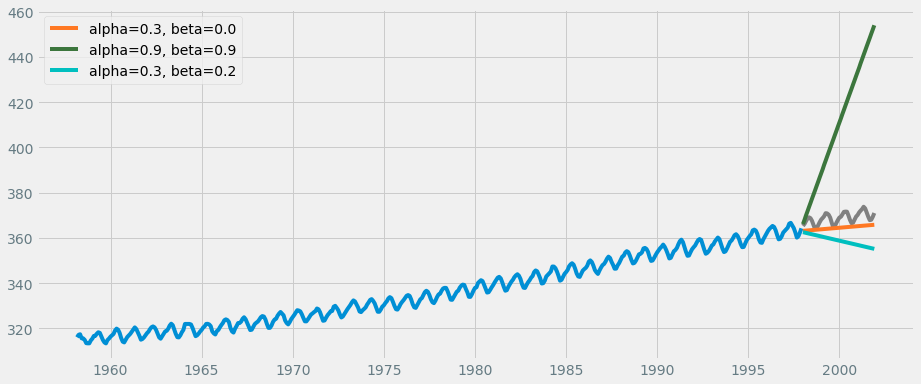

In [63]:
model_Holt = Holt(train)

fit1 = model_Holt.fit(smoothing_level=.3, smoothing_trend=.05)
pred1 = fit1.forecast(len(test))
fit2 = model_Holt.fit(optimized=True)
pred2 = fit2.forecast(len(test))
fit3 = model_Holt.fit(smoothing_level=.3, smoothing_trend=.2)
pred3 = fit3.forecast(len(test))

plt.plot(train)
plt.plot(test, color = 'gray')
plt.plot(pred1, color = '#ff7823', label = 'alpha='+str(fit1.params['smoothing_level'])[:3]+', beta='+str(fit1.params['smoothing_trend'])[:3])
plt.plot(pred2, color = '#3c763d', label = 'alpha='+str(fit2.params['smoothing_level'])[:3]+', beta='+str(fit2.params['smoothing_trend'])[:3])
plt.plot(pred3, color = 'c', label = 'alpha='+str(fit3.params['smoothing_level'])[:3]+', beta='+str(fit3.params['smoothing_trend'])[:3])
plt.legend()
plt.show()

### Holt Linear Damp

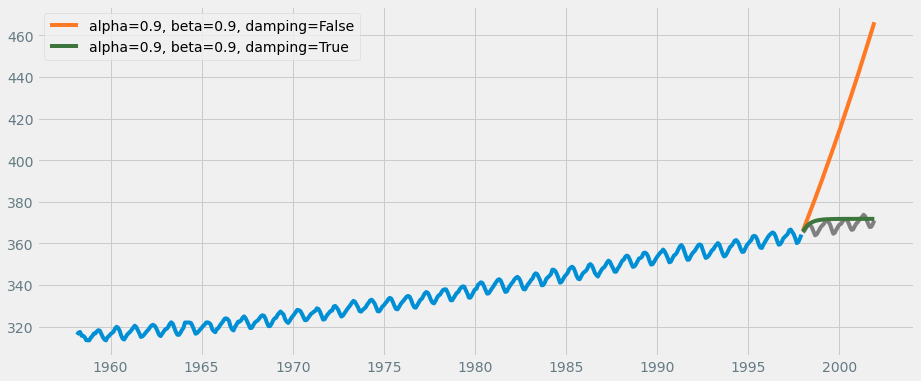

In [64]:
modelExpSmoothnD = ExponentialSmoothing(train, trend='mul', seasonal=None)
modeExpSmoothD = ExponentialSmoothing(train, trend='mul', seasonal=None, damped=True)

fit1 = modelExpSmoothnD.fit()
fit2 = modeExpSmoothD.fit()
pred1 = fit1.forecast(len(test))
pred2 = fit2.forecast(len(test))

plt.plot(train)
plt.plot(test, color = 'gray')

plt.plot(pred1, color = '#ff7823', label = 'alpha='+str(fit1.params['smoothing_level'])[:3]+', beta='+str(fit1.params['smoothing_trend'])[:3]+
", damping="+str(True if fit1.params['damping_trend']>0 else False))
plt.plot(pred2, color = '#3c763d', label = 'alpha='+str(fit2.params['smoothing_level'])[:3]+', beta='+str(fit2.params['smoothing_trend'])[:3]+
", damping="+str(True if fit2.params['damping_trend']>0 else False))

plt.legend()
plt.show()

### Holt Winters

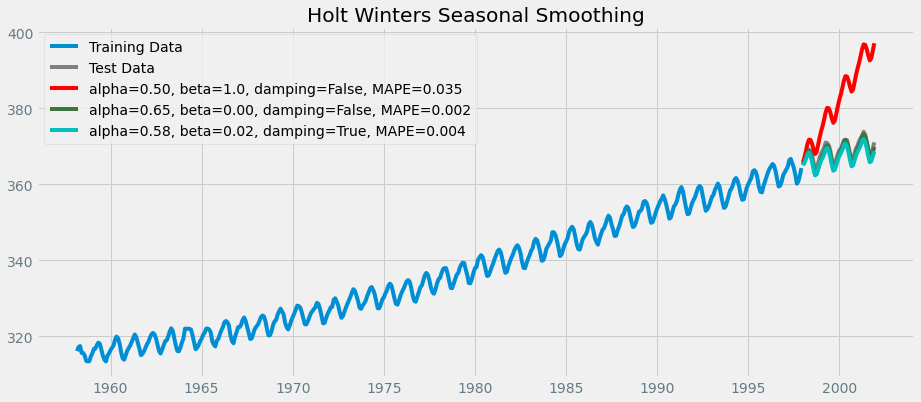

In [67]:
modelExpSmooth1 = ExponentialSmoothing(train, trend='add', seasonal="mul", seasonal_periods=12, damped = False)
modelExpSmooth2 = ExponentialSmoothing(train, trend='add', seasonal="mul", damped=False, seasonal_periods=12)
modelExpSmooth3 = ExponentialSmoothing(train, trend='add', seasonal="add", damped=True, seasonal_periods=12, )

fit1 = modelExpSmooth1.fit(smoothing_trend=1, smoothing_seasonal = 0.002)
fit2 = modelExpSmooth2.fit()
fit3 = modelExpSmooth3.fit(optimized=True)
pred1 = fit1.forecast(test.shape[0])
pred2 = fit2.forecast(test.shape[0])
pred3 = fit3.forecast(test.shape[0])

plt.plot(train, label='Training Data')
plt.plot(test, color = 'gray', label = 'Test Data')
plt.plot(pred1, color = 'red', label = 'alpha='+str(fit1.params['smoothing_level'])[:4]+', beta='+str(fit1.params['smoothing_trend'])[:4]+
", damping="+str(True if fit1.params['damping_trend']>0 else False) +', MAPE='+ str(mape(test, pred1))[:5])
plt.plot(pred2, color = '#3c763d', label = 'alpha='+str(fit2.params['smoothing_level'])[:4]+', beta='+str(fit2.params['smoothing_trend'])[:4]+
", damping="+str(True if fit2.params['damping_trend']>0 else False) +', MAPE='+ str(mape(test, pred2))[:5])
plt.plot(pred3, color = 'c', label = 'alpha='+str(fit3.params['smoothing_level'])[:4]+', beta='+str(fit3.params['smoothing_trend'])[:4]+
", damping="+str(True if fit3.params['damping_trend']>0 else False) +', MAPE='+ str(mape(test, pred3))[:5])
plt.title('Holt Winters Seasonal Smoothing')


plt.legend()
plt.show()